### Анализ данных об оптовых продажах аудиотехники


**Данные хранятся в трех источниках:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Соберем датасет с заказами по папкам:

In [1]:
import os
import pandas as pd

In [2]:
login = 'ivan-medvedev-afs9-49419'

In [3]:
way = f'/mnt/HC_Volume_18315164/home-jupyter/jupyter-{login}/shared/homeworks/python_ds_miniprojects/final_project/data/'

In [4]:
way

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/'

In [5]:
target_files = ['orders.csv', 'order_status.csv', 'products.csv']

In [6]:
data_files = []

In [7]:
for path, dirs, files in os.walk(way):
    print(path, dirs, files)  

/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/ ['products', 'orders'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products ['AV-ресивер', 'Настенная акустика', 'Система караоке', 'Напольная акустика', 'Полочная акустика', 'Сабвуфер', 'Саундбар', 'Активные колонки', 'Беспроводная акустика', 'Конденсаторный микрофон', 'Центральный канал', 'Динамический микрофон', 'AV-процессор', 'Предусилитель', 'Интегральный усилитель', 'Виниловый проигрыватель', 'Комплекты акустики', 'Наушники с микрофоном', 'Умная колонка', 'Домашний кинотеатр', 'Ламповый усилитель', 'Музыкальный центр', 'Портативная акустика', 'Проводные наушники', 'Усилитель мощности', 'Беспроводные наушники'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер [] ['

In [8]:
for path, dirs, files in os.walk(way):
    if len(files) > 0:
        for target_file in target_files:
            if target_file in files:
                pathh = os.path.join(path, target_file)
                data_files.append(pathh)


In [9]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-medvedev-afs9-49419/shared/homeworks/python_ds_miniprojects/final_project/data/products/Са

In [10]:
orders_df_list = []
order_status_df_list = []
products_df_list = []

In [11]:
for path in data_files:
    df = pd.read_csv(path)
    if 'orders.csv' in path:
        date, manager = path.split('/')[11:13]
        df['manager'] = manager
        df['date'] = date
        orders_df_list.append(df)
    if 'products.csv' in path:
        category = path.split('/')[11]
        df['category'] = category
        products_df_list.append(df)
    if 'order_status.csv' in path:
        order_status_df_list.append(df)

In [12]:
df_orders = pd.concat(orders_df_list, ignore_index=True)
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_products = pd.concat(products_df_list, ignore_index=True)

In [13]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status.csv', index=False)
df_products.to_csv('df_products.csv', index=False)

Сохранили каждый датафрейм в соответствующий csv файл.

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

In [14]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10


In [15]:
df_orders['date'] = pd.to_datetime(df_orders.date)

In [16]:
df_orders_uniq = df_orders.groupby('date', as_index=False) \
    .agg({'order_id' : 'nunique'}) \
    .rename(columns={'order_id': 'orders'})
df_orders_uniq.sort_values('orders', ascending=False)

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


In [17]:
df_orders_uniq.head()

,date,orders
0,2024-03-01,22
1,2024-03-02,2
2,2024-03-03,1
3,2024-03-04,10
4,2024-03-05,18


**Построим график с количеством заказов по дням чтобы определить, заметна ли в данных сезонность.**
 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)}
        )

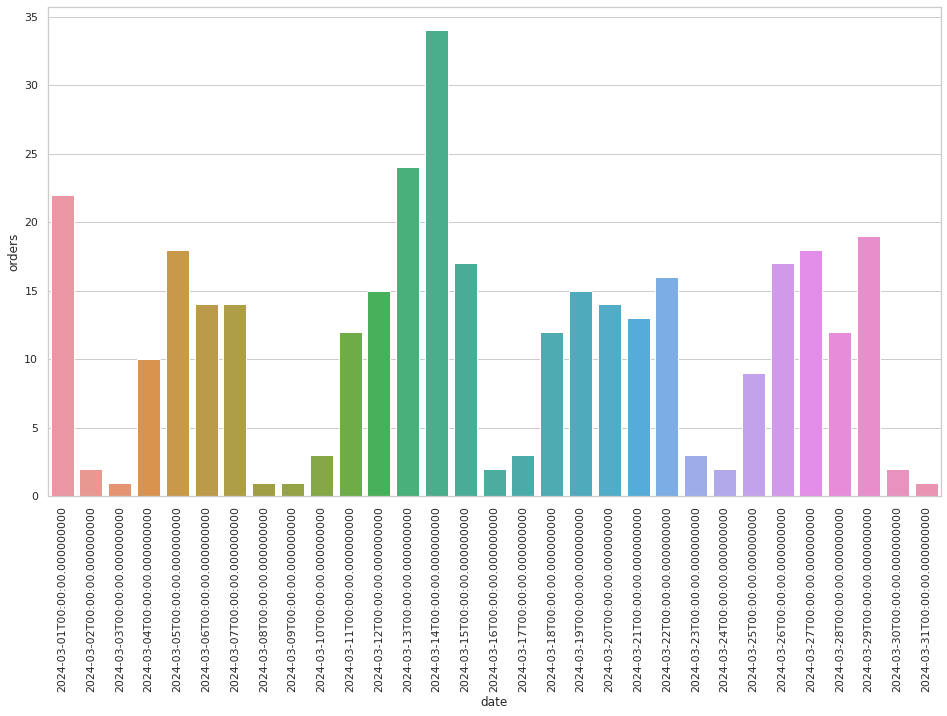

In [20]:
sns.barplot(x='date', y='orders', data=df_orders_uniq)
plt.xticks(rotation=90);

Определили, что по выходным почти нет заказов.

**Выясним причину, почему в один из дней заказы резко подскочили:**

In [21]:
orders_status = df_orders.merge(df_order_status, how='inner', on='order_id')

In [22]:
orders_status.head()

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [23]:
orders_status.to_csv('orders_status.csv', index=False)

Соотношение подтвержденных и отмененных заказов:

In [24]:
orders_status_status = orders_status[['order_id', 'status']]\
    .drop_duplicates()\
    .value_counts('status', normalize = True).round(2)


In [25]:
orders_status_status

status
confirmed    0.89
canceled     0.11
dtype: float64

Посчитаем количество подтвержденных и отмененных заказов на каждую дату.

In [26]:
orders_status_bydate_andstatus = orders_status.groupby(['date', 'status'], as_index = False)\
    .agg({'order_id' : 'nunique'})\
    .rename(columns={'order_id' : 'orders'})


In [27]:
orders_status_bydate_andstatus.head()

,date,status,orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10


In [28]:
orders_status_bydate_andstatus_pivot = orders_status_bydate_andstatus.pivot(index="date", columns="status", values="orders")\
    .fillna(0)

In [29]:
orders_status_bydate_andstatus_pivot.head()

status,canceled,confirmed
date,,
2024-03-01,2.0,20.0
2024-03-02,0.0,2.0
2024-03-03,0.0,1.0
2024-03-04,0.0,10.0
2024-03-05,0.0,18.0


In [30]:
orders_status_bydate_andstatus_pivot[['canceled', 'confirmed']] = orders_status_bydate_andstatus_pivot[['canceled', 'confirmed']].astype(int)


In [31]:
orders_status_bydate_andstatus_pivot.dtypes

status
canceled     int64
confirmed    int64
dtype: object

День, когда не было ни одного отмененного заказа:

In [32]:
orders_status_bydate_andstatus_pivot.query('confirmed == 0')

status,canceled,confirmed
date,,
2024-03-09,1,0


График с заказами по дням в разбивке по статусу заказа:

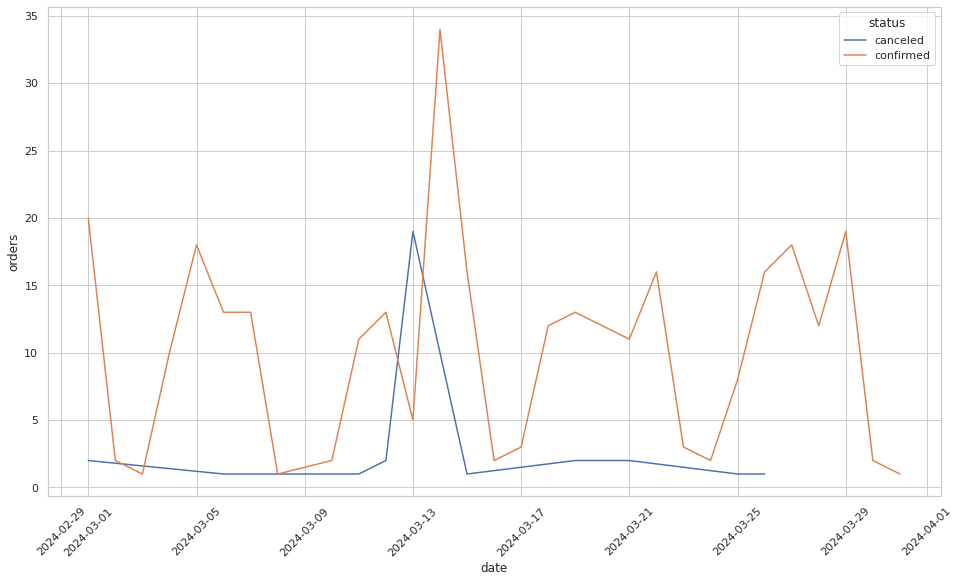

In [33]:
sns.lineplot(x='date', y='orders', data = orders_status_bydate_andstatus, hue = 'status')
plt.xticks(rotation=45);


Но основе графика можно сделать выводы:
- В день с наибольшим числом заказов было много успешно оформленных заказов;
- В день, предшествующий дню с наибольшим числом заказов, было много отмен.

Рассмотрим эти два дня отдельно:

In [34]:
thirteen_march = orders_status.query('date == "2024-03-13" and status == "canceled"')\
    .groupby(['order_id'], as_index = False)\
    .agg({'product_id' : 'nunique', 'manager' : 'max', 'client_id' : 'max', 'quantity': 'sum'})
thirteen_march

,order_id,product_id,manager,client_id,quantity
0,AFIH-00611801,11,Алексей Саксофонов,43,192
1,BBFJ-27674101,14,Ксения Балалайкина,73,294
2,CLBQ-63032648,13,Виктор Тромбонов,60,205
3,CYJY-07359557,13,Екатерина Тарелкина,56,316
4,GHGB-88045656,4,Ксения Балалайкина,7,42
5,JEIF-69283221,15,Виктор Тромбонов,94,207
6,JQQO-28609300,15,Виктор Тромбонов,93,252
7,KJJS-03491897,18,Алексей Саксофонов,66,399
8,MIGZ-68487439,17,Алексей Саксофонов,51,325
9,NBIO-35476164,14,Виктор Тромбонов,95,319


In [35]:
fourteen_march = orders_status.query('date == "2024-03-14" and status == "confirmed"')\
    .groupby(['order_id'], as_index = False)\
    .agg({'product_id' : 'nunique', 'manager' : 'max', 'client_id' : 'max', 'quantity': 'sum'})
fourteen_march

,order_id,product_id,manager,client_id,quantity
0,ACXS-56511429,8,Алексей Саксофонов,24,177
1,AUZX-12706022,19,Екатерина Тарелкина,83,369
2,BCMM-97072924,17,Алексей Саксофонов,51,325
3,BGHE-44722549,8,Виктор Тромбонов,95,149
4,DMEB-71700015,12,Сергей Контрабасов,93,190
5,DOJS-07233317,16,Маргарита Камертонова,56,277
6,EJHJ-34261015,20,Максим Барабанов,87,319
7,EPBF-14743479,15,Виктор Тромбонов,94,207
8,EZAA-08394172,9,Анастасия Дудкина,39,176
9,FDEB-71487438,11,Алексей Саксофонов,43,192


In [36]:
march_13_14 = thirteen_march.merge(fourteen_march, how = 'inner',  on = ['manager', 'client_id', 'product_id', 'quantity'])
march_13_14 

,order_id_x,product_id,manager,client_id,quantity,order_id_y
0,AFIH-00611801,11,Алексей Саксофонов,43,192,FDEB-71487438
1,BBFJ-27674101,14,Ксения Балалайкина,73,294,UETB-44283966
2,CLBQ-63032648,13,Виктор Тромбонов,60,205,IECD-18739530
3,CYJY-07359557,13,Екатерина Тарелкина,56,316,WNMY-98871151
4,GHGB-88045656,4,Ксения Балалайкина,7,42,JUGG-73806170
5,JEIF-69283221,15,Виктор Тромбонов,94,207,EPBF-14743479
6,JQQO-28609300,15,Виктор Тромбонов,93,252,OWZC-14247946
7,KJJS-03491897,18,Алексей Саксофонов,66,399,GRCH-73394464
8,MIGZ-68487439,17,Алексей Саксофонов,51,325,BCMM-97072924
9,NBIO-35476164,14,Виктор Тромбонов,95,319,NFML-87752700


Доля заказов, которые повторяют вчерашние:

In [37]:
march_13_14.shape[0] / fourteen_march.shape[0]

0.47058823529411764

На основе полученных данных делаем вывод:
Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние.

Посчитаем среднее значение курса доллара за месяц.

In [38]:
currency = []

with open('usd_rate.txt') as f:
    for line in f:
        currency.append(line)
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [39]:
df_currency = pd.DataFrame(currency, columns=['col_name'])
df_currency

,col_name
0,"2024-03-01,90.8423,Доллар США\n"
1,"2024-03-02,91.3336,Доллар США\n"
2,"2024-03-03,91.3336,Доллар США\n"
3,"2024-03-04,91.3336,Доллар США\n"
4,"2024-03-05,91.3534,Доллар США\n"
5,"2024-03-06,91.1604,Доллар США\n"
6,"2024-03-07,90.3412,Доллар США\n"
7,"2024-03-08,90.7493,Доллар США\n"
8,"2024-03-09,90.7493,Доллар США\n"
9,"2024-03-10,90.7493,Доллар США\n"


In [40]:
df_currency['date'] = df_currency['col_name'].apply(lambda x: x.split(',')[0])
df_currency['currency_rate'] = df_currency['col_name'].apply(lambda x: x.split(',')[1])

In [41]:
df_currency.head()

,col_name,date,currency_rate
0,"2024-03-01,90.8423,Доллар США\n",2024-03-01,90.8423
1,"2024-03-02,91.3336,Доллар США\n",2024-03-02,91.3336
2,"2024-03-03,91.3336,Доллар США\n",2024-03-03,91.3336
3,"2024-03-04,91.3336,Доллар США\n",2024-03-04,91.3336
4,"2024-03-05,91.3534,Доллар США\n",2024-03-05,91.3534


In [42]:
df_currency['date'] = pd.to_datetime(df_currency['date'])

In [43]:
df_currency.dtypes

col_name                 object
date             datetime64[ns]
currency_rate            object
dtype: object

In [44]:
df_currency = df_currency.drop(columns='col_name')

In [45]:
df_currency

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [46]:
df_currency['currency_rate'] = df_currency['currency_rate'].astype(float)

In [47]:
df_currency.currency_rate.mean().round(2)

91.7

Подсчитаем общую выручку:

In [48]:
df_full = pd.merge(orders_status, df_products, how='inner', left_on = 'product_id', right_on = 'id')

In [49]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика


In [50]:
df_full = pd.merge(df_full, df_currency, on = 'date')

In [51]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493


In [52]:
df_full['price_rub'] = df_full['price'] * df_full['currency_rate']

In [53]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698


In [54]:
df_full['revenue'] = df_full['price_rub'] * df_full['quantity']

In [55]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [56]:
df_confirmed = df_full.loc[df_full['status'] == 'confirmed']

In [57]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [58]:
df_confirmed.revenue.sum().round(2)

2038231821.56

Средний чек в этом месяце (в рублях):

In [59]:
(df_confirmed.revenue.sum() / df_confirmed['order_id'].nunique()).round(2)

6596219.49

Посмотрим на динамику выручки, среднего чека и числа заказов на каждый день внутри месяца:

In [60]:
df_report_by_date = df_confirmed.groupby('date', as_index = False)\
    .agg({'order_id': 'nunique', 'revenue': 'sum'})\
    .rename(columns={'order_id': 'orders'})
df_report_by_date.head()

,date,orders,revenue
0,2024-03-01,20,1.554118e+08
1,2024-03-02,2,1.197167e+07
2,2024-03-03,1,2.548418e+06
3,2024-03-04,10,6.404993e+07
4,2024-03-05,18,8.952724e+07


In [61]:
df_report_by_date['avg_check'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)

In [62]:
df_report_by_date.head()

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46


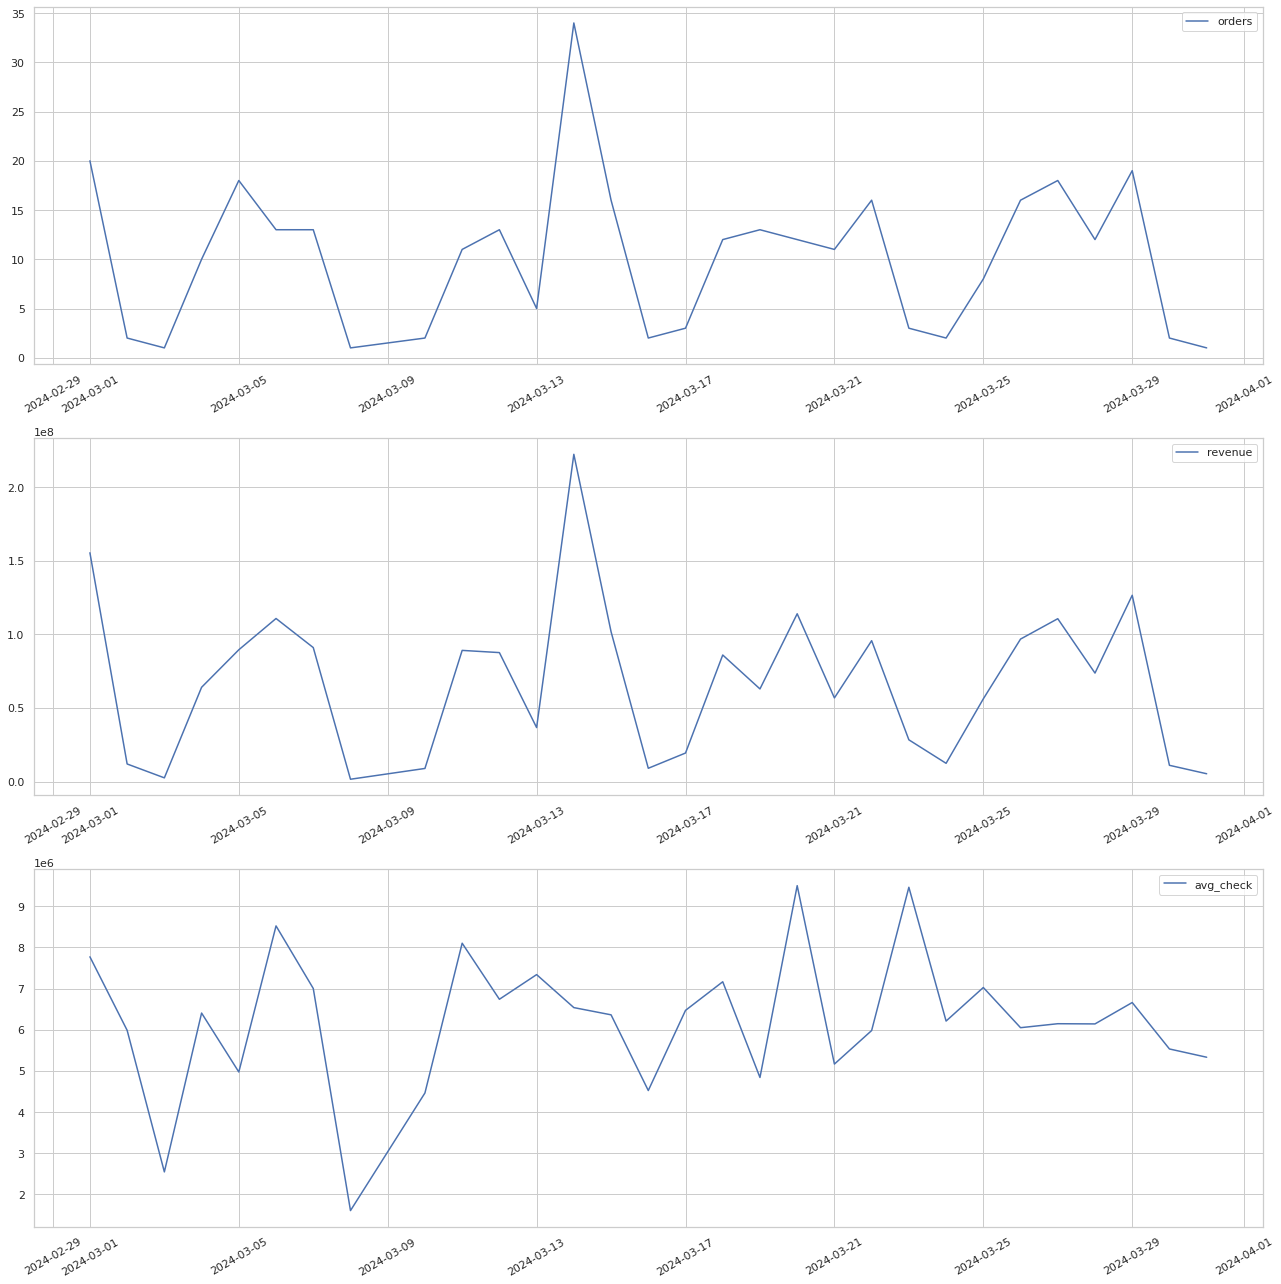

In [63]:
metrics = ['orders', 'revenue', 'avg_check']

fig, axes = plt.subplots(3, 1, figsize=(18, 18))
for i, metric in enumerate(metrics):
    df = df_report_by_date[['date', metric]].set_index('date')
    sns.lineplot(data=df, ax=axes[i]);
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')

plt.tight_layout();

На основе графика делаем выводы:
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение
- с течением времени выручка то увеличивается, то уменьшается
- на протяжении всего месяца средний чек то увеличивается, то уменьшается

### Анализ интереса клиентов к брендам

In [64]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [65]:
df_full['brand'] = df_full['name'].apply(lambda x: x.split(',')[0])
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode


Кол-во брендов:

In [66]:
df_full.brand.nunique()

121

In [67]:
df_full_confirmed = df_full.loc[df_full['status'] == 'confirmed']
df_full_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode


In [68]:
df_brands_revenue = df_full_confirmed.groupby('brand', as_index = False)\
    .agg({'revenue': 'sum', 'order_id': 'nunique'})\
    .rename(columns={'order_id':'orders'})\
    .sort_values('revenue', ascending = False)
df_brands_revenue

,brand,revenue,orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
1,ART,2.670040e+04,2
18,Bravo Audio,2.405086e+04,1


Бренд, который принес наибольшую выручку:

In [69]:
df_brands_revenue.sort_values('orders', ascending=False).head(1)

,brand,revenue,orders
46,JBL,2.665961e+08,264


Заказывали ли хоть раз товар:

In [70]:
products_in_orders = df_confirmed.product_id.unique()
products_in_orders

array([489, 594, 670, ..., 656, 223, 537])

In [71]:
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products.head()

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes


In [72]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

Примерно треть товаров не была заказана ни разу в этом месяце.

Анализ ни разу не заказанных товаров у брендов:

In [73]:
df_products['brand'] = df_products['name'].apply(lambda x: x.split(',')[0])
df_products.head()

,id,name,price,category,is_in_orders,brand
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon


In [74]:
df_products_brand = df_products.groupby(['brand', 'is_in_orders'], as_index = False)\
    .agg({'id': 'nunique'})\
    .rename(columns={'id': 'products'})
df_products_brand


,brand,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5
2,ART,yes,1
3,ASUS,no,1
4,ASUS,yes,2
...,...,...,...
208,Xiaomi,yes,4
209,YAQIN,no,1
210,Yamaha,no,15
211,Yamaha,yes,91


In [75]:
df_products_brand_pivot = df_products_brand.pivot(index="brand", columns="is_in_orders", values="products")\
    .fillna(0)\
    .reset_index()
df_products_brand_pivot

is_in_orders,brand,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0
3,Adam Audio,1.0,0.0
4,Amazon,0.0,4.0
...,...,...,...
141,Wharfedale,7.0,50.0
142,Xiaomi,0.0,4.0
143,YAQIN,1.0,0.0
144,Yamaha,15.0,91.0


In [76]:
df_products_brand_pivot['total'] = df_products_brand_pivot['no'] + df_products_brand_pivot['yes']
df_products_brand_pivot

is_in_orders,brand,no,yes,total
0,AKG,6.0,5.0,11.0
1,ART,0.0,1.0,1.0
2,ASUS,1.0,2.0,3.0
3,Adam Audio,1.0,0.0,1.0
4,Amazon,0.0,4.0,4.0
...,...,...,...,...
141,Wharfedale,7.0,50.0,57.0
142,Xiaomi,0.0,4.0,4.0
143,YAQIN,1.0,0.0,1.0
144,Yamaha,15.0,91.0,106.0


In [77]:
df_products_brand_pivot['no_ratio'] = df_products_brand_pivot['no'] / df_products_brand_pivot['total']
df_products_brand_pivot

is_in_orders,brand,no,yes,total,no_ratio
0,AKG,6.0,5.0,11.0,0.545455
1,ART,0.0,1.0,1.0,0.000000
2,ASUS,1.0,2.0,3.0,0.333333
3,Adam Audio,1.0,0.0,1.0,1.000000
4,Amazon,0.0,4.0,4.0,0.000000
...,...,...,...,...,...
141,Wharfedale,7.0,50.0,57.0,0.122807
142,Xiaomi,0.0,4.0,4.0,0.000000
143,YAQIN,1.0,0.0,1.0,1.000000
144,Yamaha,15.0,91.0,106.0,0.141509


In [78]:
df_products_brand_pivot.loc[(df_products_brand_pivot['total'] > 15) & (df_products_brand_pivot['no_ratio'] >0.5)].brand.to_list()


['Dali', 'KEF', 'Marantz', 'Pioneer']

Выявили бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.

Отчет по сделкам каждого менеджера:

In [79]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [80]:
df_confirmed_by_manager = df_confirmed.groupby('manager', as_index=False)\
    .agg({'revenue': 'sum', 'order_id': 'nunique'})\
    .rename(columns={'order_id': 'orders'})\
    .sort_values('revenue', ascending=False)
df_confirmed_by_manager


,manager,revenue,orders
9,Маргарита Камертонова,3.473886e+08,48
4,Виктор Тромбонов,3.188999e+08,50
8,Максим Барабанов,2.401478e+08,40
5,Владимир Ударников,2.084865e+08,31
0,Алексей Саксофонов,1.953435e+08,27
7,Ксения Балалайкина,1.817621e+08,27
6,Екатерина Тарелкина,1.781576e+08,28
10,Надежда Гармошкина,1.347836e+08,21
1,Анастасия Дудкина,1.234504e+08,20
2,Антон Скрипкин,5.150268e+07,7


In [81]:
df_confirmed_by_manager['%revenue'] = (df_confirmed_by_manager['revenue'] / df_confirmed_by_manager['revenue'].sum() * 100).round(2)
df_confirmed_by_manager['%orders'] = (df_confirmed_by_manager['orders'] / df_confirmed_by_manager['orders'].sum() * 100).round(2)
df_confirmed_by_manager

,manager,revenue,orders,%revenue,%orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


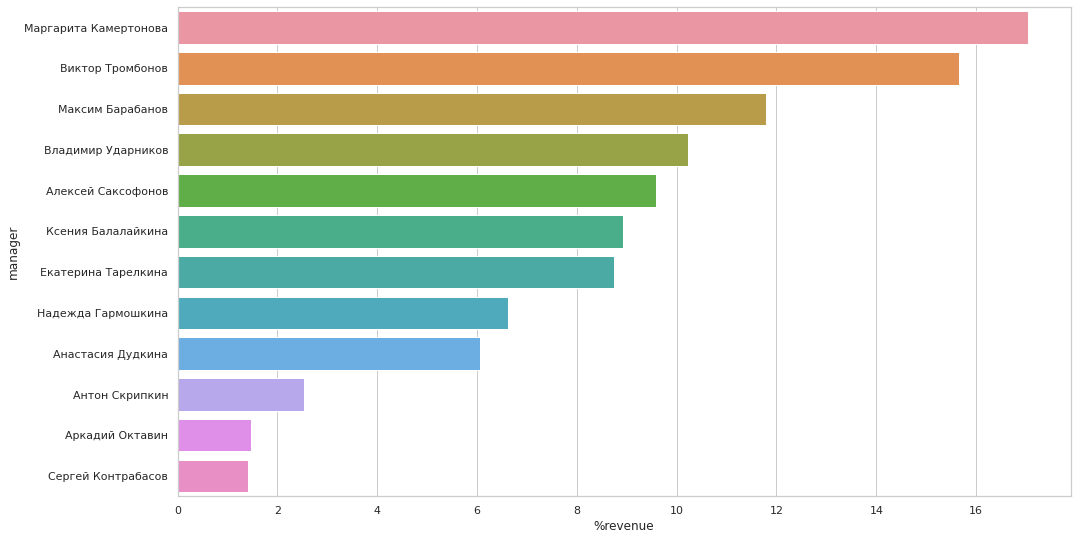

In [82]:
sns.barplot(data = df_confirmed_by_manager, x = '%revenue', y = 'manager')

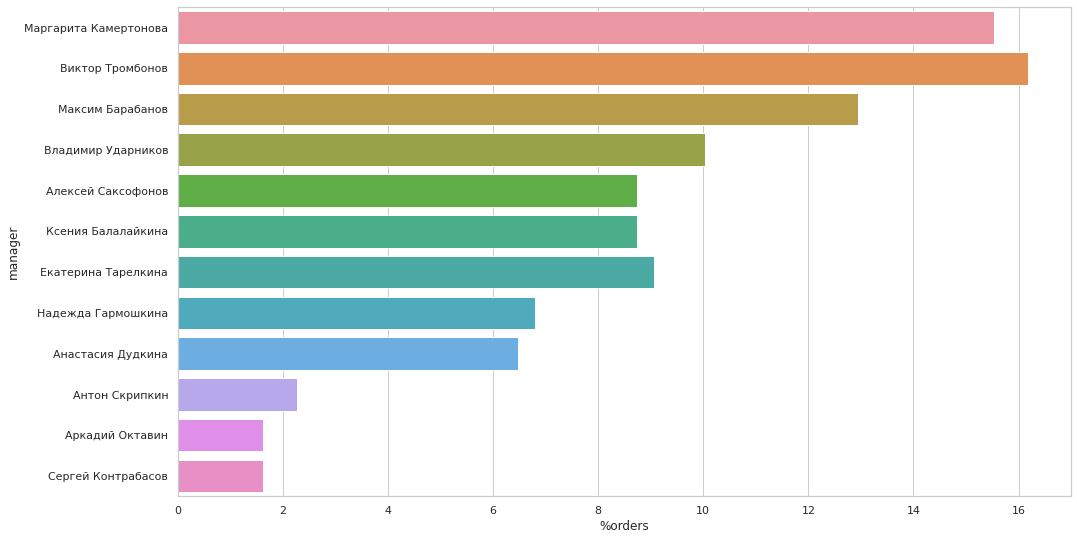

In [83]:
sns.barplot(data = df_confirmed_by_manager, x = '%orders', y = 'manager')

На основе данных можно сделать выводы:
- лучшим менеджером по % выручки стала Маргарита Камертонова
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных
- лидер по % заказов реализовал более 16% заказов
- наихудшие показатели у Сергея Контрабасова
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина